In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.layers.recurrent import GRU
from keras.layers import Flatten, Conv1D, MaxPool1D
from sklearn.metrics import confusion_matrix, classification_report

In [92]:
# Load data dari device
data_bank = pd.read_csv("../Downloads/banking.csv") 
data_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [93]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

## 1. Data Deskriptif & Visualisasinya

In [94]:
# Menampilkan data deskriptif dalam DataFrame data_bank
data_bank.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [95]:
# Menampilkan data deskriptif untuk tipe kolom bertipe string/object
data_bank.describe(include = "O")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


Karena pada data deskriptif tidak terlalu menarik untuk dilihat, maka kami akan membuatkan sebuah visualisasi untuk data deskriptif, seperti mean, median, standard deviasi, nilai maximum dan minimum.

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:title={'center':'Visualisasi Data Deskriptif Untuk Kolom Previous'}, xlabel='previous', ylabel='Density'>

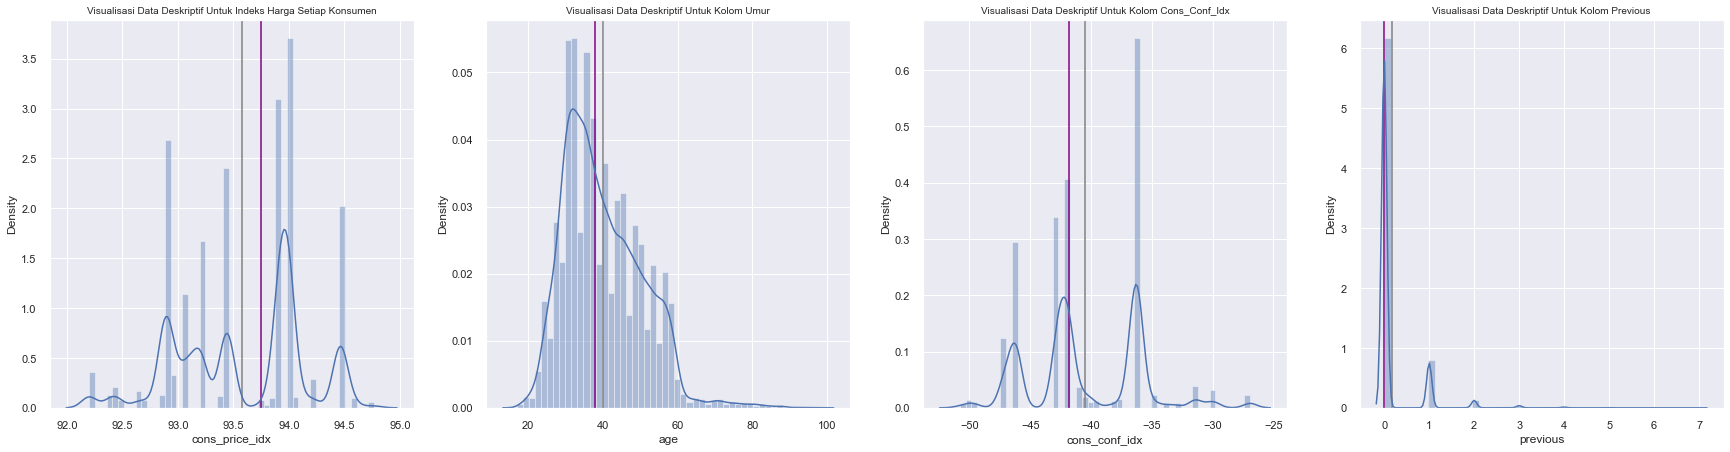

In [96]:
# Melakukan visualisasi data deskriptif (Mean & Median) untuk 4 kolom
plt.figure(figsize = (30, 50))

# Melakukan visualisasi data deskritif untuk kolom indeks harga setiap konsumen
plt.subplot(6,4,1)
plt.axvline(data_bank["cons_price_idx"].mean(), color = "gray", label="mean")
plt.axvline(data_bank["cons_price_idx"].median(), color = "purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Indeks Harga Setiap Konsumen", fontsize=10)
sns.distplot(data_bank["cons_price_idx"])

# Melakukan visualisasi data deskriptif untuk kolom umur
plt.subplot(6,4,2)
plt.axvline(data_bank["age"].mean(), color="gray", label="mean")
plt.axvline(data_bank["age"].median(), color="purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Umur", fontsize=10)
sns.distplot(data_bank["age"])

# Melakukan visualisasi data deskriptif untuk kolom umur
plt.subplot(6,4,3)
plt.axvline(data_bank["cons_conf_idx"].mean(), color="gray", label="mean")
plt.axvline(data_bank["cons_conf_idx"].median(), color="purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Cons_Conf_Idx", fontsize=10)
sns.distplot(data_bank["cons_conf_idx"])

# Melakukan visualisasi data deskriptif untuk kolom umur
plt.subplot(6,4,4)
plt.axvline(data_bank["previous"].mean(), color="gray", label="mean")
plt.axvline(data_bank["previous"].median(), color="purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Previous", fontsize=10)
sns.distplot(data_bank["previous"])

Ket:
1. Terlihat pada kolom cons_price_idx mempunyai nilai rata2 dan median sama dengan ketika kami menggunakan sebuah fungsi .describe(), yaitu nilai rata2 berada di nilai 93.5 sedangkan nilai mediannya adalah 93.749.
2. Terlihat pada kolom age/umur dalam sebuah dataset bank marketing mempunyai nilai rata2 yaitu 40 tahun sedangkan pada nilai median mempunyai nilai yaitu sekitar umur 37 - 38 tahun.
3. Pada kolom consumer confidence index atau indeks kepercayaan konsumen bank memiliki selisih yang sangat tipis antara nilai rata2 dan median. Pada nilai rata2 terdapat -40.502600 sedangkan nilai median yaitu -41.800000.
4. Dan terakhir pada kolom previous, nilai rata2 adalah 0.172963 sedangkan nilai mediannya adalah 0.

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:title={'center':'Visualisasi Data Deskriptif Untuk Kolom Emp_Var_Rate'}, xlabel='emp_var_rate', ylabel='Density'>

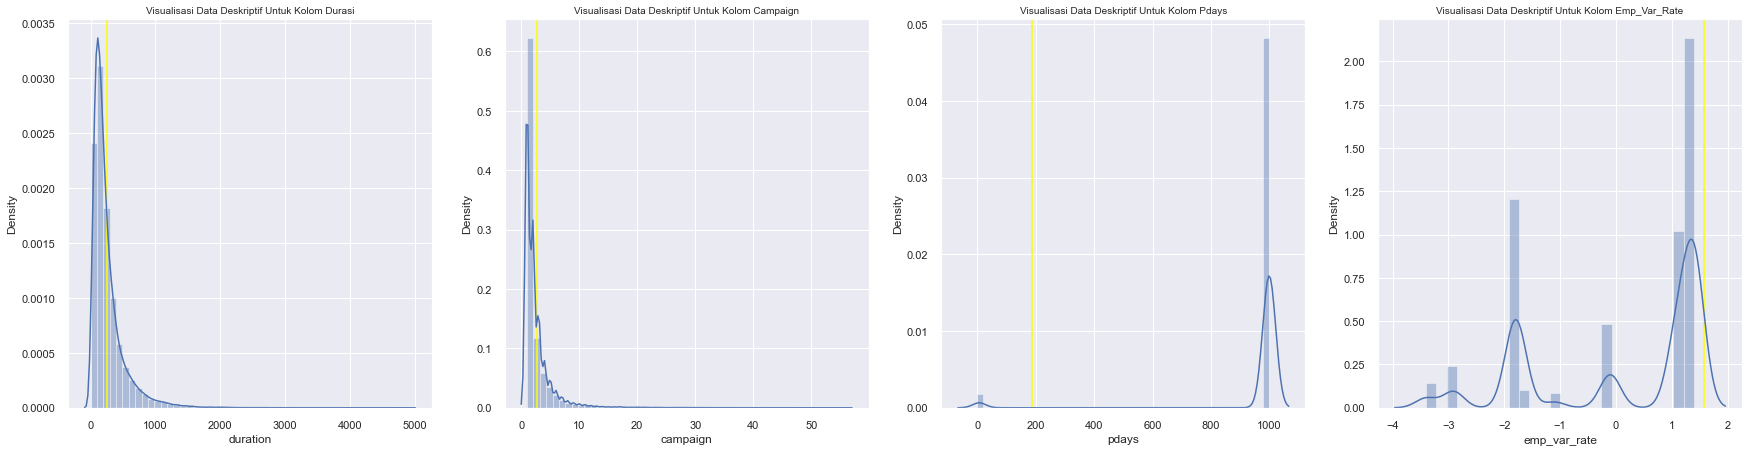

In [97]:
# Melakukan visualisasi data deskriptif (Standard Deviasi) untuk 4 kolom
plt.figure(figsize = (30, 50))

# Melakukan visualisasi data deskritif untuk kolom duration
plt.subplot(6,4,1)
plt.axvline(data_bank["duration"].std(), color = "yellow")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Durasi", fontsize=10)
sns.distplot(data_bank["duration"])

# Melakukan visualisasi data deskriptif untuk kolom campaign
plt.subplot(6,4,2)
plt.axvline(data_bank["campaign"].std(), label="std", color="yellow")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Campaign", fontsize=10)
sns.distplot(data_bank["campaign"])

# Melakukan visualisasi data deskriptif untuk kolom pdays
plt.subplot(6,4,3)
plt.axvline(data_bank["pdays"].std(), color="yellow")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Pdays", fontsize=10)
sns.distplot(data_bank["pdays"])

# Melakukan visualisasi data deskriptif untuk kolom emp_var_rate
plt.subplot(6,4,4)
plt.axvline(data_bank["emp_var_rate"].std(), color="yellow")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Emp_Var_Rate", fontsize=10)
sns.distplot(data_bank["emp_var_rate"])

Ket:

1. Terlihat pada kolom duration mempunyai nilai standard deviasi adalah 259.279249.
2. Terlihat pada kolom campaign dalam sebuah dataset bank marketing mempunyai standard deviasi berada di sekitar nilai 2.
3. Pada kolom pdays memiliki nilai standard deviasi yaitu 186.910907.
4. Dan terakhir nilai standard deviasi pada kolom emp_var_rate adalah 1.570960.

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:title={'center':'Visualisasi Data Deskriptif Untuk Kolom pdays'}, xlabel='pdays', ylabel='Density'>

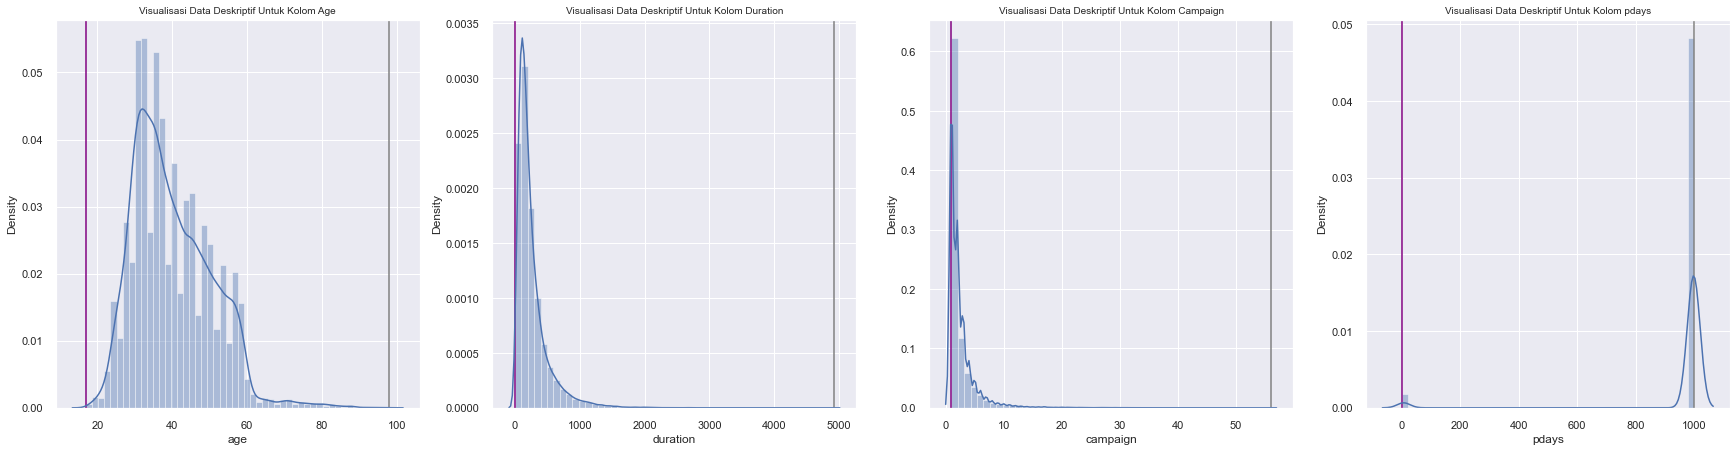

In [98]:
# Melakukan visualisasi data deskriptif (Max & Min) untuk 4 kolom
plt.figure(figsize = (30, 50))

# Melakukan visualisasi data deskritif untuk kolom umur
plt.subplot(6,4,1)
plt.axvline(data_bank["age"].max(), color = "gray", label="mean")
plt.axvline(data_bank["age"].min(), color = "purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Age", fontsize=10)
sns.distplot(data_bank["age"])

# Melakukan visualisasi data deskriptif untuk kolom durasi
plt.subplot(6,4,2)
plt.axvline(data_bank["duration"].max(), color="gray", label="mean")
plt.axvline(data_bank["duration"].min(), color="purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Duration", fontsize=10)
sns.distplot(data_bank["duration"])

# Melakukan visualisasi data deskriptif untuk kolom campaign
plt.subplot(6,4,3)
plt.axvline(data_bank["campaign"].max(), color="gray", label="mean")
plt.axvline(data_bank["campaign"].min(), color="purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Campaign", fontsize=10)
sns.distplot(data_bank["campaign"])

# Melakukan visualisasi data deskriptif untuk kolom pdays
plt.subplot(6,4,4)
plt.axvline(data_bank["pdays"].max(), color="gray", label="mean")
plt.axvline(data_bank["pdays"].min(), color="purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Kolom pdays", fontsize=10)
sns.distplot(data_bank["pdays"])

## 2. Visualisasi Sebelum Pre-Processing

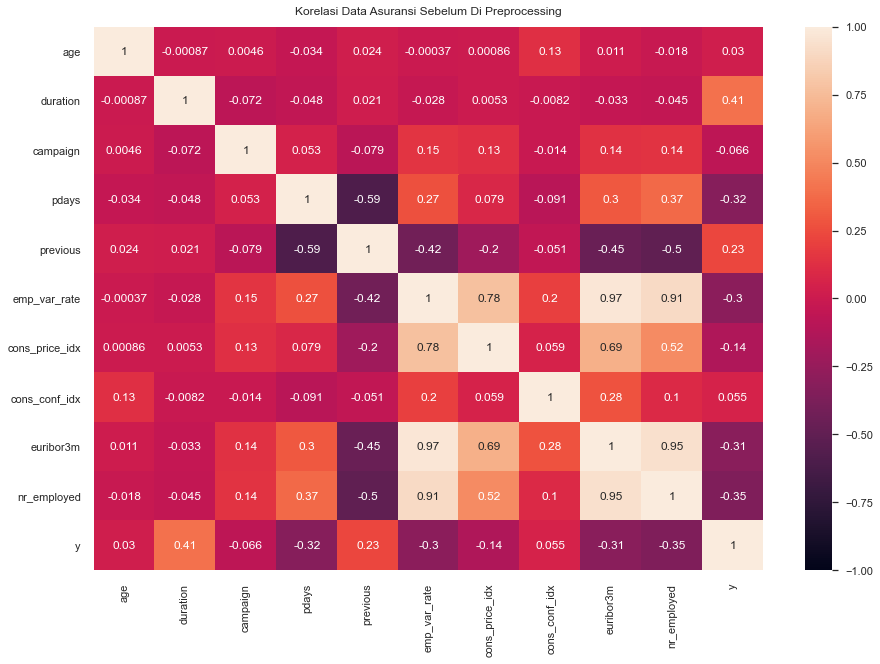

In [99]:
# Membuat sebuah korelasi untuk dataframe data_bank
plt.figure(figsize=(15, 10))

korelasi_data_bank= sns.heatmap(data_bank.corr(), vmin=-1, vmax=1, annot=True)
korelasi_data_bank.set_title("Korelasi Data Asuransi Sebelum Di Preprocessing", fontdict={"fontsize":12}, pad=12);

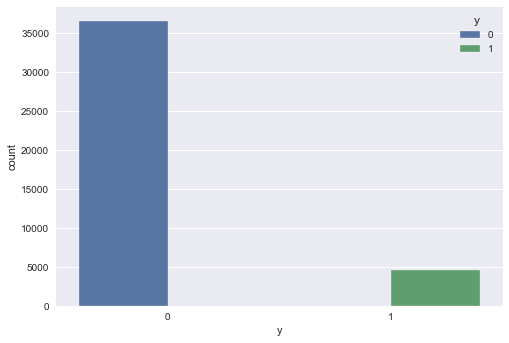

<Figure size 720x720 with 0 Axes>

In [100]:
# Melakukan visualisasi untuk kolom y

plt.style.use("seaborn") # Untuk menjadikan grafik matplotlib menggunakan style yang dimiliki oleh library seaborn
sns.countplot(x="y", hue="y", data=data_bank)
plt.figure(figsize=(10, 10))
plt.show()

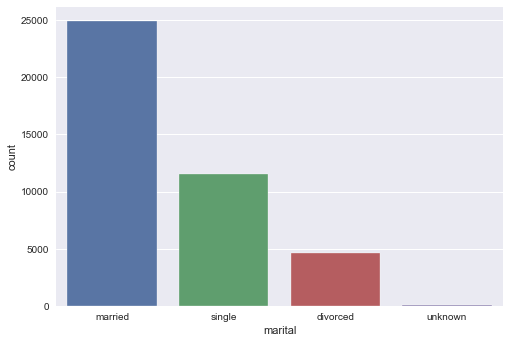

<Figure size 720x720 with 0 Axes>

In [101]:
# Melakukan visualisasi untuk kolom housing

sns.countplot(x="marital", data=data_bank)
plt.figure(figsize=(10, 10))
plt.show()

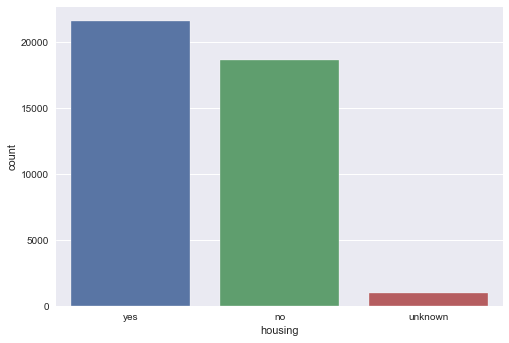

<Figure size 720x720 with 0 Axes>

In [102]:
# Melakukan visualisasi untuk kolom housing

sns.countplot(x="housing", data=data_bank)
plt.figure(figsize=(10, 10))
plt.show()

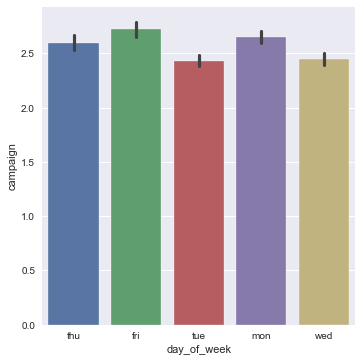

<Figure size 1800x1800 with 0 Axes>

In [103]:
# Melakukan visualisasi dari catplot untuk kolom day_of_week

sns.catplot(x="day_of_week", y="campaign", kind="bar", data=data_bank)
plt.figure(figsize=(25, 25))
plt.show()

<AxesSubplot:xlabel='month', ylabel='day_of_week'>

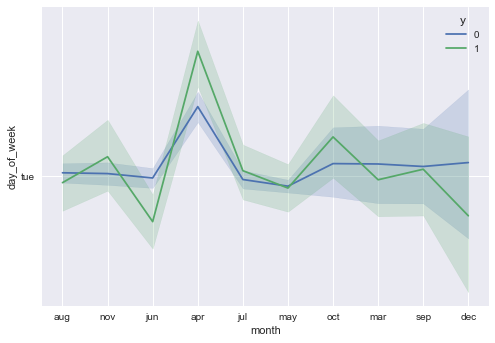

In [104]:
sns.lineplot(x="month", y="day_of_week",
             hue="y", data=data_bank)

## 3. Pre-Processing Data & Visualisasi

In [105]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [106]:
# Mengubah tipe data yang string menjadi int menggunakan LabelEncoder

from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()   

data_bank['job']= le.fit_transform(data_bank['job']) 
data_bank['marital']= le.fit_transform(data_bank['marital'])
data_bank['education']= le.fit_transform(data_bank['education'])
data_bank['default']= le.fit_transform(data_bank['default'])
data_bank['housing']= le.fit_transform(data_bank['housing'])
data_bank['loan']= le.fit_transform(data_bank['loan'])
data_bank['contact']= le.fit_transform(data_bank['contact'])
data_bank['month']= le.fit_transform(data_bank['month'])
data_bank['day_of_week']= le.fit_transform(data_bank['day_of_week'])
data_bank['poutcome']= le.fit_transform(data_bank['poutcome'])

data_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,0,2,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [107]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

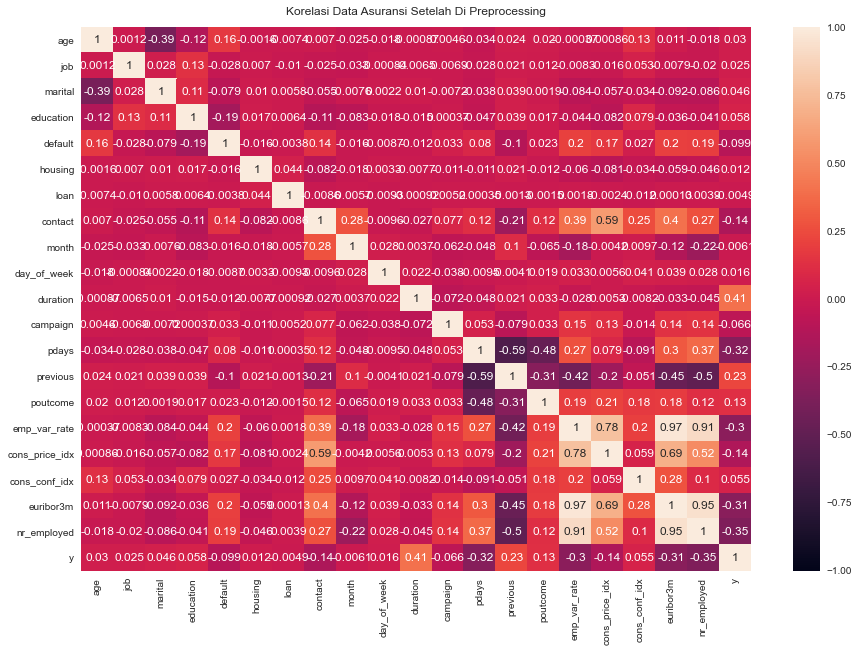

In [108]:
# Membuat sebuah korelasi untuk dataframe data_asuransi_train
plt.figure(figsize=(15, 10))

korelasi_data_bank= sns.heatmap(data_bank.corr(), vmin=-1, vmax=1, annot=True)
korelasi_data_bank.set_title("Korelasi Data Asuransi Setelah Di Preprocessing", fontdict={"fontsize":12}, pad=12);

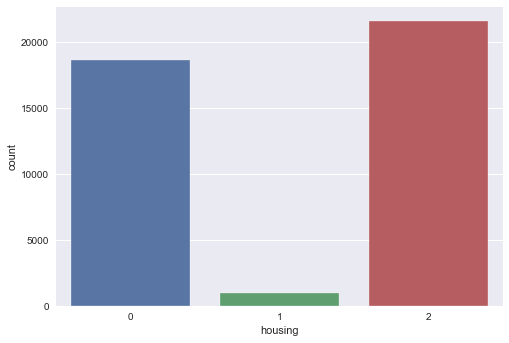

<Figure size 720x720 with 0 Axes>

In [109]:
# Melakukan visualisasi untuk kolom housing

sns.countplot(x="housing", data=data_bank)
plt.figure(figsize=(10, 10))
plt.show()

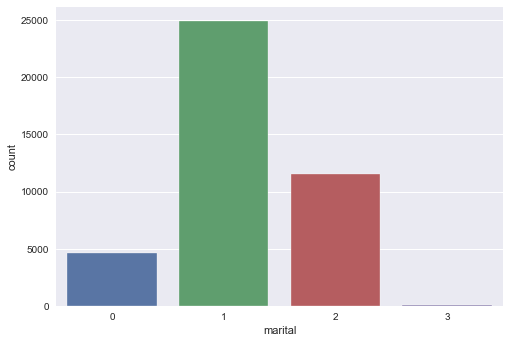

<Figure size 720x720 with 0 Axes>

In [110]:
# Melakukan visualisasi untuk kolom housing

sns.countplot(x="marital", data=data_bank)
plt.figure(figsize=(10, 10))
plt.show()

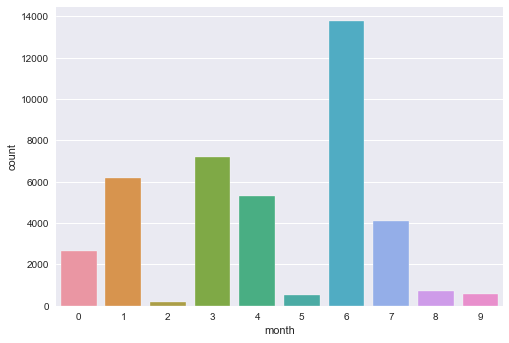

In [111]:
sns.countplot(x='month', data=data_bank)
sns.set(rc={'figure.figsize':(10, 8)})
plt.show()

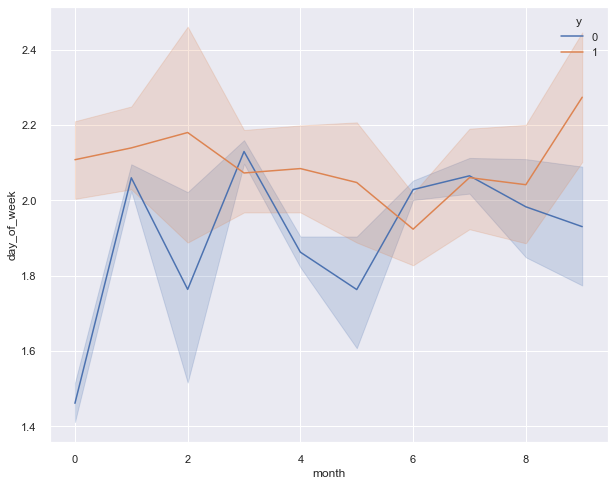

<Figure size 360x360 with 0 Axes>

In [112]:
# Membuat visualisasi time series berdasarkan Tanggal_Asuransi untuk kolom Gender dengan nilai hue=Target
sns.lineplot(data=data_bank, x="month", y="day_of_week", hue="y")
plt.figure(figsize=(5, 5))
plt.show()

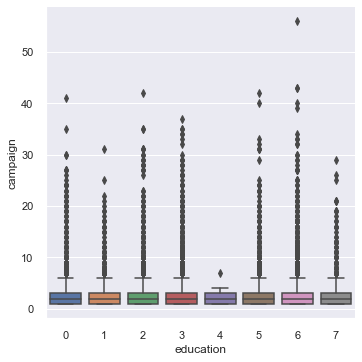

In [113]:
# Membuat visualisasi untuk kolom education
sns.catplot(x="education", y="campaign", kind="box", data=data_bank)

## 4. Mempersiapkan Data Train & Data Test

In [114]:
# Pemisahan data menjadi 2 variable

x = data_bank.drop(["y"], axis=1)

y = data_bank["y"]

In [115]:
# Melakukan pembagian data menjadi 2 bagian (data train & data test)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [116]:
len(x_train)

32950

In [117]:
# Melakukan proses standarisasi
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [118]:
x_train

array([[-1.34939207,  1.46203401, -0.28415572, ...,  0.88354713,
         0.71522455,  0.33276918],
       [ 0.0942852 ,  1.46203401, -0.28415572, ...,  0.94826173,
         0.77455036,  0.84598458],
       [-0.19445026,  0.62876086, -0.28415572, ..., -1.42460703,
        -1.274782  , -0.938511  ],
       ...,
       [-0.96441146,  1.73979172, -0.28415572, ..., -0.06560038,
        -1.35714696, -1.25529355],
       [ 1.15298186,  0.62876086, -1.92995129, ..., -0.32445879,
         0.26365721,  0.39916902],
       [-0.86816631,  1.73979172, -0.28415572, ...,  0.94826173,
         0.77512634,  0.84598458]])

## 4. Pemodelan dengan Machine Learning (SVM, Naive Bayes & Decision Tree)

### SVM

In [119]:
# Pemanggilan model SVM terhadap variabel training

classifier = SVC(kernel="linear", random_state=1)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=1)

#### Melihat Tingkat Akurasi Pada Variable Test & Train Di SVM

In [120]:
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred_test = classifier.predict(x_test)
print(y_pred_test)

print("------------Prediksi dari variabel train-----------------")
y_pred_train = classifier.predict(x_train)
print(y_pred_train)

------------Prediksi dari variabel test------------------
[0 0 0 ... 0 0 0]
------------Prediksi dari variabel train-----------------
[0 0 0 ... 0 0 0]


In [121]:
# Pengukuran performa untuk variabel test dan train

print("------------------Performa Variabel Test------------------------")
tp, tn, fp, fn = confusion_matrix(y_test, y_pred_test).ravel()
print(tp, tn, fp, fn)

print("------------------Performa Variabel Train------------------------")
tp, tn, fp, fn = confusion_matrix(y_train, y_pred_train).ravel()
print(tp, tn, fp, fn)

------------------Performa Variabel Test------------------------
7157 144 650 287
------------------Performa Variabel Train------------------------
28632 615 2609 1094


Ket:
- Variabel test
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 7157.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 144.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 650.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 287.

- Variabel train
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 28632.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 615.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 2609.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 1094.

In [122]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model SVM

print("-----------------------Variabel Test-------------------------------")
print(classification_report(y_test, y_pred_test))

print("-----------------------Variabel Train------------------------------")
print(classification_report(y_train, y_pred_train))

-----------------------Variabel Test-------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7301
           1       0.67      0.31      0.42       937

    accuracy                           0.90      8238
   macro avg       0.79      0.64      0.68      8238
weighted avg       0.89      0.90      0.89      8238

-----------------------Variabel Train------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     29247
           1       0.64      0.30      0.40      3703

    accuracy                           0.90     32950
   macro avg       0.78      0.64      0.68     32950
weighted avg       0.89      0.90      0.89     32950



Ket:
1. Precision: merupakan seberapa akurat model yang digunakan dalam melakukan klasifikasi.
2. Recall: merupakan gambaran dari keberhasilan suatu algoritma.
3. F1-score: Perbandingan rata-rata precision dan recall yang telah dibobotkan.

#### Melihat Tingkat Akurasi Dari Kedua Variabel Data (Train & Test) Di SVM

In [123]:
print("Tingkat Akurasi Data Train Di SVM :", classifier.score(x_train, y_train))
print("Tingkat Akurasi Data Test Di SVM :", classifier.score(x_test, y_test))

Tingkat Akurasi Data Train Di SVM : 0.902154779969651
Tingkat Akurasi Data Test Di SVM : 0.9036173828599174


### Naive Bayes

In [124]:
# Pemanggilan model Naive Bayes terhadap variabel training

modelnb = GaussianNB()
modelnb.fit(x_train, y_train)

GaussianNB()

#### Melihat Tingkat Akurasi Pada Variable Test & Train Di Naive Bayes

In [125]:
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred_test = modelnb.predict(x_test)
print(y_pred_test)

print("------------Prediksi dari variabel train-----------------")
y_pred_train = modelnb.predict(x_train)
print(y_pred_train)

------------Prediksi dari variabel test------------------
[0 0 0 ... 0 0 0]
------------Prediksi dari variabel train-----------------
[0 0 0 ... 1 0 0]


In [126]:
# Pengukuran performa untuk variabel test dan train

print("------------------Performa Variabel Test------------------------")
tp, tn, fp, fn = confusion_matrix(y_test, y_pred_test).ravel()
print(tp, tn, fp, fn)

print("------------------Performa Variabel Train------------------------")
tp, tn, fp, fn = confusion_matrix(y_train, y_pred_train).ravel()
print(tp, tn, fp, fn)

------------------Performa Variabel Test------------------------
6450 851 375 562
------------------Performa Variabel Train------------------------
25636 3611 1478 2225


Ket:
- Variabel test
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 6450.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 851.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 375.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 562.

- Variabel train
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 25636.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 3611.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 1478.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 2225.

In [127]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model Naive Bayes

print("-----------------------Variabel Test-------------------------------")
print(classification_report(y_test, y_pred_test))

print("-----------------------Variabel Train------------------------------")
print(classification_report(y_train, y_pred_train))

-----------------------Variabel Test-------------------------------
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      7301
           1       0.40      0.60      0.48       937

    accuracy                           0.85      8238
   macro avg       0.67      0.74      0.70      8238
weighted avg       0.88      0.85      0.86      8238

-----------------------Variabel Train------------------------------
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     29247
           1       0.38      0.60      0.47      3703

    accuracy                           0.85     32950
   macro avg       0.66      0.74      0.69     32950
weighted avg       0.88      0.85      0.86     32950



Ket:
1. Precision: merupakan seberapa akurat model yang digunakan dalam melakukan klasifikasi.
2. Recall: merupakan gambaran dari keberhasilan suatu algoritma.
3. F1-score: Perbandingan rata-rata precision dan recall yang telah dibobotkan.

#### Melihat Tingkat Akurasi Dari Kedua Variabel Data (Train & Test) Di Naive Bayes

In [128]:
print("Tingkat Akurasi Data Train Di Naive Bayes :", modelnb.score(x_train, y_train))
print("Tingkat Akurasi Data Test Di Naive Bayes :", modelnb.score(x_test, y_test))

Tingkat Akurasi Data Train Di Naive Bayes : 0.8455538694992413
Tingkat Akurasi Data Test Di Naive Bayes : 0.8511774702597718


### Decision Tree

In [129]:
# Pemaggilan model decision tree terhadap variabel training

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)

DecisionTreeClassifier()

#### Melihat Tingkat Akurasi Pada Variable Test & Train Di Decision Tree

In [130]:
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred_test = decisiontree.predict(x_test)
print(y_pred_test)

print("------------Prediksi dari variabel train-----------------")
y_pred_train = decisiontree.predict(x_train)
print(y_pred_train)

------------Prediksi dari variabel test------------------
[0 0 0 ... 0 1 0]
------------Prediksi dari variabel train-----------------
[0 0 0 ... 0 0 0]


In [131]:
# Pengukuran performa untuk variabel test dan train

print("------------------Performa Variabel Test------------------------")
tp, tn, fp, fn = confusion_matrix(y_test, y_pred_test).ravel()
print(tp, tn, fp, fn)

print("------------------Performa Variabel Train------------------------")
tp, tn, fp, fn = confusion_matrix(y_train, y_pred_train).ravel()
print(tp, tn, fp, fn)

------------------Performa Variabel Test------------------------
6764 537 512 425
------------------Performa Variabel Train------------------------
29247 0 0 3703


Ket:
- Variabel test
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 6764.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 537.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 512.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 425.

- Variabel train
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 29247.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 0.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 0.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 3703.

In [132]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model Decision Tree

print("-----------------------Variabel Test-------------------------------")
print(classification_report(y_test, y_pred_test))

print("-----------------------Variabel Train------------------------------")
print(classification_report(y_train, y_pred_train))

-----------------------Variabel Test-------------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7301
           1       0.44      0.45      0.45       937

    accuracy                           0.87      8238
   macro avg       0.69      0.69      0.69      8238
weighted avg       0.87      0.87      0.87      8238

-----------------------Variabel Train------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29247
           1       1.00      1.00      1.00      3703

    accuracy                           1.00     32950
   macro avg       1.00      1.00      1.00     32950
weighted avg       1.00      1.00      1.00     32950



Ket:
1. Precision: merupakan seberapa akurat model yang digunakan dalam melakukan klasifikasi.
2. Recall: merupakan gambaran dari keberhasilan suatu algoritma.
3. F1-score: Perbandingan rata-rata precision dan recall yang telah dibobotkan.

#### Melihat Tingkat Akurasi Dari Kedua Variabel Data (Train & Test) Di Decision Tree

In [133]:
print("Tingkat Akurasi Data Train Di Naive Bayes :", decisiontree.score(x_train, y_train))
print("Tingkat Akurasi Data Test Di Naive Bayes :", decisiontree.score(x_test, y_test))

Tingkat Akurasi Data Train Di Naive Bayes : 1.0
Tingkat Akurasi Data Test Di Naive Bayes : 0.8726632677834426


## 5. Pemodelan Dengan Deep Learning (LSTM, RNN Layer GRU & CNN 1 Dimensi)

In [134]:
# Reshaping untuk variabel x_train dan x_test

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [135]:
x_train

array([[[-1.34939207],
        [ 1.46203401],
        [-0.28415572],
        ...,
        [ 0.88354713],
        [ 0.71522455],
        [ 0.33276918]],

       [[ 0.0942852 ],
        [ 1.46203401],
        [-0.28415572],
        ...,
        [ 0.94826173],
        [ 0.77455036],
        [ 0.84598458]],

       [[-0.19445026],
        [ 0.62876086],
        [-0.28415572],
        ...,
        [-1.42460703],
        [-1.274782  ],
        [-0.938511  ]],

       ...,

       [[-0.96441146],
        [ 1.73979172],
        [-0.28415572],
        ...,
        [-0.06560038],
        [-1.35714696],
        [-1.25529355]],

       [[ 1.15298186],
        [ 0.62876086],
        [-1.92995129],
        ...,
        [-0.32445879],
        [ 0.26365721],
        [ 0.39916902]],

       [[-0.86816631],
        [ 1.73979172],
        [-0.28415572],
        ...,
        [ 0.94826173],
        [ 0.77512634],
        [ 0.84598458]]])

### LSTM

In [136]:
# Membuat jaringan syarat tiruan untuk model LSTM (Long Short Term Memory)
model = Sequential()
 
# Menambah layer LSTM yang pertama dan Dropout regularisation
model.add(LSTM(units = 150, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
 
# Menambah layer LSTM yang kedua dan Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))
 
# Menambah layer LSTM yang ketiga dan Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
 
# Menambah layer LSTM yang keempat dan Dropout regularisation
model.add(LSTM(units = 23))
model.add(Dropout(0.2))

# Menambah layer output dan dropout regularisation
model.add(Dense(units = 1))
model.add(Dropout(0.2))

# Melihat rancangan network LSTM kita
model.summary()

opt = Adam(lr=.001)
 
# Compile LSTM dengan nilai opt, loss, dan matrics
model.compile(optimizer =opt, loss = 'mean_squared_error', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 20, 150)           91200     
_________________________________________________________________
dropout_19 (Dropout)         (None, 20, 150)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 20, 100)           100400    
_________________________________________________________________
dropout_20 (Dropout)         (None, 20, 100)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 20, 50)            30200     
_________________________________________________________________
dropout_21 (Dropout)         (None, 20, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 23)               

In [137]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 350, validation_data=(x_test, y_test))

Epoch 1/20
95/95 [==============================] - 55s 472ms/step - loss: 0.0978 - accuracy: 0.8884 - val_loss: 0.0882 - val_accuracy: 0.8869
Epoch 2/20
95/95 [==============================] - 41s 431ms/step - loss: 0.0905 - accuracy: 0.8916 - val_loss: 0.0814 - val_accuracy: 0.8940
Epoch 3/20
95/95 [==============================] - 39s 415ms/step - loss: 0.0878 - accuracy: 0.8938 - val_loss: 0.0807 - val_accuracy: 0.8909
Epoch 4/20
95/95 [==============================] - 39s 412ms/step - loss: 0.0845 - accuracy: 0.8972 - val_loss: 0.0783 - val_accuracy: 0.8995
Epoch 5/20
95/95 [==============================] - 39s 411ms/step - loss: 0.0854 - accuracy: 0.8962 - val_loss: 0.0825 - val_accuracy: 0.8880
Epoch 6/20
95/95 [==============================] - 39s 407ms/step - loss: 0.0810 - accuracy: 0.8983 - val_loss: 0.0771 - val_accuracy: 0.8979
Epoch 7/20
95/95 [==============================] - 40s 416ms/step - loss: 0.0832 - accuracy: 0.8956 - val_loss: 0.0746 - val_accuracy: 0.9003

#### Melihat Tingkat Akurasi Pada Variable Test & Train Di LSTM

In [138]:
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred_test = model.predict(x_test)
print(y_pred_test)

print("------------Prediksi dari variabel train-----------------")
y_pred_train = model.predict(x_train)
print(y_pred_train)

------------Prediksi dari variabel test------------------
[[ 0.00509234]
 [-0.0007599 ]
 [ 0.04365706]
 ...
 [ 0.00544892]
 [ 0.23815295]
 [ 0.01852145]]
------------Prediksi dari variabel train-----------------
[[-0.00254916]
 [ 0.04265374]
 [ 0.01860908]
 ...
 [ 0.24544066]
 [-0.00884989]
 [ 0.02046989]]


In [139]:
# Pengukuran performa untuk variabel test dan train

print("------------------Performa Variabel Test------------------------")
tp, tn, fp, fn = confusion_matrix(y_test, y_pred_test.round()).ravel()
print(tp, tn, fp, fn)

print("------------------Performa Variabel Train------------------------")
tp, tn, fp, fn = confusion_matrix(y_train, y_pred_train.round()).ravel()
print(tp, tn, fp, fn)

------------------Performa Variabel Test------------------------
7240 61 723 214
------------------Performa Variabel Train------------------------
28988 259 2862 841


Ket:
- Variabel test
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 7240.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 61.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 723.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 214.

- Variabel train
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 28988.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 259.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 2862.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 841.

In [140]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model LSTM

print("-----------------------Variabel Test-------------------------------")
print(classification_report(y_test, y_pred_test.round()))

print("-----------------------Variabel Train------------------------------")
print(classification_report(y_train, y_pred_train.round()))

-----------------------Variabel Test-------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7301
           1       0.78      0.23      0.35       937

    accuracy                           0.90      8238
   macro avg       0.84      0.61      0.65      8238
weighted avg       0.89      0.90      0.88      8238

-----------------------Variabel Train------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     29247
           1       0.76      0.23      0.35      3703

    accuracy                           0.91     32950
   macro avg       0.84      0.61      0.65     32950
weighted avg       0.89      0.91      0.88     32950



Ket:
1. Precision: merupakan seberapa akurat model yang digunakan dalam melakukan klasifikasi.
2. Recall: merupakan gambaran dari keberhasilan suatu algoritma.
3. F1-score: Perbandingan rata-rata precision dan recall yang telah dibobotkan.

#### Melihat Tingkat Akurasi Dari Kedua Data (Test & Train) DI LSTM

In [141]:
print("Tingkat Akurasi Data Train Di LSTM :", model.evaluate(x_train, y_train))
print("Tingkat Akurasi Data Test Di LSTM :", model.evaluate(x_test, y_test))

1030/1030 [==============================] - 17s 16ms/step - loss: 0.0639 - accuracy: 0.9053
Tingkat Akurasi Data Train Di LSTM : [0.06393065303564072, 0.9052807092666626]
258/258 [==============================] - 4s 16ms/step - loss: 0.0644 - accuracy: 0.9048
Tingkat Akurasi Data Test Di LSTM : [0.06435436755418777, 0.9048312902450562]


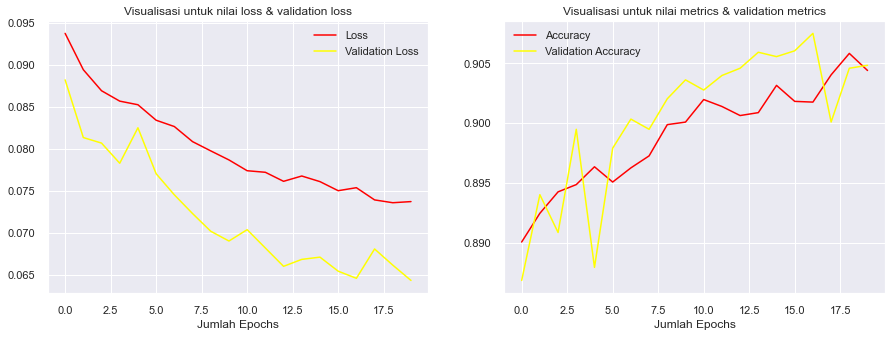

In [142]:
# Membuat visualisasi dari hasil neural network antara loss, validation loss dan akurasi, validation akurasi

plt.figure(figsize=(15,5))
# Membuat visualisasi untuk nilai loss dan validation loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color="red", label="Loss")
plt.plot(history.history['val_loss'], color="yellow", label="Validation Loss")
plt.title("Visualisasi untuk nilai loss & validation loss")
plt.xlabel("Jumlah Epochs")
plt.legend()

# Membuat visualisasi untuk nilai akurasi dan validation akurasi
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color="red", label="Accuracy")
plt.plot(history.history['val_accuracy'], color="yellow", label="Validation Accuracy")
plt.title("Visualisasi untuk nilai metrics & validation metrics")
plt.xlabel("Jumlah Epochs")
plt.legend()
plt.show();

### RNN Dengan Layer GRU 

In [143]:
# Membuat jaringan syarat tiruan untuk model RNN dengan layer GRU
model = Sequential()
 
# Menambah layer RNN yang pertama dan Dropout regularisation
model.add(GRU(units = 150, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
 
# Menambah layer RNN yang kedua dan Dropout regularisation
model.add(GRU(units = 100, return_sequences = True))
model.add(Dropout(0.2))
 
# Menambah layer RNN yang ketiga dan Dropout regularisation
model.add(GRU(units = 50, return_sequences = True))
model.add(Dropout(0.2))
 
# Menambah layer RNN yang keempat dan Dropout regularisation
model.add(GRU(units = 23))
model.add(Dropout(0.2))

# Menambah layer output dan dropout regularisation
model.add(Dense(units = 1))
model.add(Dropout(0.2))

# Melihat rancangan neural network pada model RNN
model.summary()

opt = Adam(lr=.001)
 
# Compile RNN dengan nilai opt, loss, dan matrics
model.compile(optimizer =opt, loss = 'mean_squared_error', metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 20, 150)           68850     
_________________________________________________________________
dropout_24 (Dropout)         (None, 20, 150)           0         
_________________________________________________________________
gru_5 (GRU)                  (None, 20, 100)           75600     
_________________________________________________________________
dropout_25 (Dropout)         (None, 20, 100)           0         
_________________________________________________________________
gru_6 (GRU)                  (None, 20, 50)            22800     
_________________________________________________________________
dropout_26 (Dropout)         (None, 20, 50)            0         
_________________________________________________________________
gru_7 (GRU)                  (None, 23)               

In [144]:
# Membuat model jaringan syaraf tiruan untuk model RNN dengan layer GRU 
history = model.fit(x_train, y_train, epochs = 20, batch_size = 100, validation_data=(x_test, y_test))

Epoch 1/20
330/330 [==============================] - 47s 109ms/step - loss: 0.0933 - accuracy: 0.8905 - val_loss: 0.0836 - val_accuracy: 0.8876
Epoch 2/20
330/330 [==============================] - 34s 102ms/step - loss: 0.0886 - accuracy: 0.8911 - val_loss: 0.0761 - val_accuracy: 0.9006
Epoch 3/20
330/330 [==============================] - 35s 105ms/step - loss: 0.0819 - accuracy: 0.8968 - val_loss: 0.0742 - val_accuracy: 0.9007
Epoch 4/20
330/330 [==============================] - 38s 116ms/step - loss: 0.0809 - accuracy: 0.8967 - val_loss: 0.0761 - val_accuracy: 0.8899
Epoch 5/20
330/330 [==============================] - 37s 113ms/step - loss: 0.0797 - accuracy: 0.8991 - val_loss: 0.0679 - val_accuracy: 0.9036
Epoch 6/20
330/330 [==============================] - 40s 121ms/step - loss: 0.0775 - accuracy: 0.9019 - val_loss: 0.0669 - val_accuracy: 0.9051
Epoch 7/20
330/330 [==============================] - 38s 114ms/step - loss: 0.0772 - accuracy: 0.9014 - val_loss: 0.0691 - val_ac

#### Melihat Tingkat Akurasi Pada Variable Test & Train Di RNN Layer GRU

In [145]:
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred_test = model.predict(x_test)
print(y_pred_test)

print("------------Prediksi dari variabel train-----------------")
y_pred_train = model.predict(x_train)
print(y_pred_train)

------------Prediksi dari variabel test------------------
[[-0.00471042]
 [-0.00823306]
 [ 0.00922165]
 ...
 [ 0.00063559]
 [ 0.33146834]
 [-0.00405331]]
------------Prediksi dari variabel train-----------------
[[-0.00617651]
 [ 0.02052948]
 [ 0.02186622]
 ...
 [ 0.44423407]
 [ 0.00665271]
 [-0.0019917 ]]


In [146]:
# Pengukuran performa untuk variabel test dan train

print("------------------Performa Variabel Test------------------------")
tp, tn, fp, fn = confusion_matrix(y_test, y_pred_test.round()).ravel()
print(tp, tn, fp, fn)

print("------------------Performa Variabel Train------------------------")
tp, tn, fp, fn = confusion_matrix(y_train, y_pred_train.round()).ravel()
print(tp, tn, fp, fn)

------------------Performa Variabel Test------------------------
7266 35 785 152
------------------Performa Variabel Train------------------------
29121 126 3086 617


Ket:
- Variabel Test
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 7266.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 35.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 785.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 152.

- Variabel Train
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 29121.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 126.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 3086.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 617. 

In [147]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model RNN

print("-----------------------Variabel Test-------------------------------")
print(classification_report(y_test, y_pred_test.round()))

print("-----------------------Variabel Train------------------------------")
print(classification_report(y_train, y_pred_train.round()))

-----------------------Variabel Test-------------------------------
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      7301
           1       0.81      0.16      0.27       937

    accuracy                           0.90      8238
   macro avg       0.86      0.58      0.61      8238
weighted avg       0.89      0.90      0.87      8238

-----------------------Variabel Train------------------------------
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     29247
           1       0.83      0.17      0.28      3703

    accuracy                           0.90     32950
   macro avg       0.87      0.58      0.61     32950
weighted avg       0.90      0.90      0.87     32950



Ket:
1. Precision: merupakan seberapa akurat model yang digunakan dalam melakukan klasifikasi.
2. Recall: merupakan gambaran dari keberhasilan suatu algoritma.
3. F1-score: Perbandingan rata-rata precision dan recall yang telah dibobotkan.

#### Melihat Tingkat Akurasi Dari Kedua Data (Train & Test) Di RNN

In [148]:
print("Akurasi Data Train Di RNN:", model.evaluate(x_train, y_train))
print("Akurasi Data Test Di RNN:", model.evaluate(x_test, y_test))

1030/1030 [==============================] - 14s 13ms/step - loss: 0.0616 - accuracy: 0.9025
Akurasi Data Train Di RNN: [0.06161036342382431, 0.9025189876556396]
258/258 [==============================] - 3s 13ms/step - loss: 0.0641 - accuracy: 0.9005
Akurasi Data Test Di RNN: [0.06412486732006073, 0.9004612565040588]


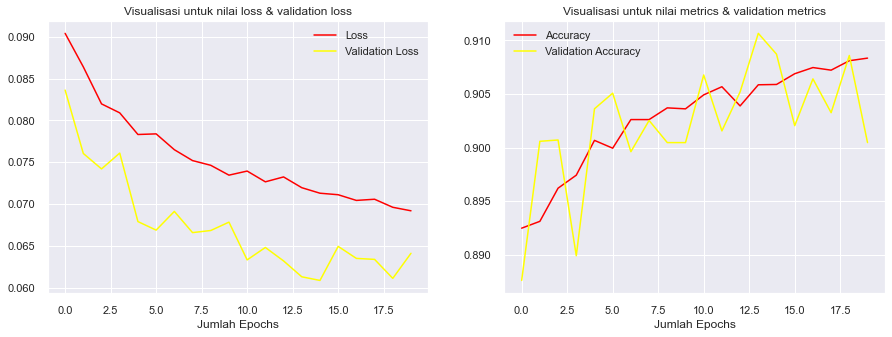

In [149]:
# Membuat visualisasi dari hasil neural network antara loss, validation loss dan akurasi, validation akurasi

plt.figure(figsize=(15,5))
# Membuat visualisasi untuk nilai loss dan validation loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color="red", label="Loss")
plt.plot(history.history['val_loss'], color="yellow", label="Validation Loss")
plt.title("Visualisasi untuk nilai loss & validation loss")
plt.xlabel("Jumlah Epochs")
plt.legend()

# Membuat visualisasi untuk nilai akurasi dan validation akurasi
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color="red", label="Accuracy")
plt.plot(history.history['val_accuracy'], color="yellow", label="Validation Accuracy")
plt.title("Visualisasi untuk nilai metrics & validation metrics")
plt.xlabel("Jumlah Epochs")
plt.legend()
plt.show();

### CNN 1 Dimensi

In [161]:
# Membuat jaringan syarat tiruan untuk model CNN
model = Sequential()
 
# Menambah layer CNN yang pertama dan Dropout regularisation
model.add(Conv1D(filters=150, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
 
# Menambah layer CNN yang kedua dan Dropout regularisation
model.add(Conv1D(filters=100, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
 
# Menambah layer CNN yang ketiga dan Dropout regularisation
model.add(Conv1D(filters=50, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
 
# Menambah layer CNN yang keempat dan Dropout regularisation
model.add(Conv1D(filters=50, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(MaxPool1D(pool_size=2))
model.add(Flatten())

# Menambah layer output dan dropout regularisation
model.add(Dense(units = 1))

# Melihat rancangan network CNN yang telah dibuat
model.summary()

opt = Adam(lr=.001)
 
# Compile CNN dengan nilai opt, loss, dan matrics
model.compile(optimizer =opt, loss = 'mean_squared_error', metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 16, 150)           900       
_________________________________________________________________
dropout_33 (Dropout)         (None, 16, 150)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 12, 100)           75100     
_________________________________________________________________
dropout_34 (Dropout)         (None, 12, 100)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 8, 50)             25050     
_________________________________________________________________
dropout_35 (Dropout)         (None, 8, 50)             0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 4, 50)            

In [162]:
# Membuat model jaringan syaraf tiruan untuk model CNN
history = model.fit(x_train, y_train, epochs = 20, batch_size = 250, validation_data=(x_test, y_test))

Epoch 1/20
132/132 [==============================] - 12s 82ms/step - loss: 0.0772 - accuracy: 0.8994 - val_loss: 0.0671 - val_accuracy: 0.9037
Epoch 2/20
132/132 [==============================] - 12s 88ms/step - loss: 0.0689 - accuracy: 0.9007 - val_loss: 0.0652 - val_accuracy: 0.9022
Epoch 3/20
132/132 [==============================] - 10s 76ms/step - loss: 0.0662 - accuracy: 0.9051 - val_loss: 0.0642 - val_accuracy: 0.9042
Epoch 4/20
132/132 [==============================] - 10s 76ms/step - loss: 0.0659 - accuracy: 0.9047 - val_loss: 0.0613 - val_accuracy: 0.9105
Epoch 5/20
132/132 [==============================] - 11s 84ms/step - loss: 0.0638 - accuracy: 0.9082 - val_loss: 0.0602 - val_accuracy: 0.9099
Epoch 6/20
132/132 [==============================] - 11s 81ms/step - loss: 0.0638 - accuracy: 0.9082 - val_loss: 0.0598 - val_accuracy: 0.9132
Epoch 7/20
132/132 [==============================] - 10s 78ms/step - loss: 0.0616 - accuracy: 0.9109 - val_loss: 0.0603 - val_accuracy:

#### Melihat Tingkat Akurasi Pada Variable Test & Train Di CNN 1 Dimensi

In [163]:
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred_test = model.predict(x_test)
print(y_pred_test)

print("------------Prediksi dari variabel train-----------------")
y_pred_train = model.predict(x_train)
print(y_pred_train)

------------Prediksi dari variabel test------------------
[[-0.00891709]
 [ 0.01348132]
 [ 0.00220522]
 ...
 [ 0.00921231]
 [ 0.4341293 ]
 [-0.01430006]]
------------Prediksi dari variabel train-----------------
[[ 0.00780142]
 [ 0.09889743]
 [ 0.01909152]
 ...
 [ 0.60277784]
 [ 0.01315029]
 [-0.00396761]]


In [164]:
# Pengukuran performa untuk variabel test dan train

print("------------------Performa Variabel Test------------------------")
tp, tn, fp, fn = confusion_matrix(y_test, y_pred_test.round()).ravel()
print(tp, tn, fp, fn)

print("------------------Performa Variabel Train------------------------")
tp, tn, fp, fn = confusion_matrix(y_train, y_pred_train.round()).ravel()
print(tp, tn, fp, fn)

------------------Performa Variabel Test------------------------
7091 210 485 452
------------------Performa Variabel Train------------------------
28470 777 1874 1829


Ket:
- Variabel Test
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 7091.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 210.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 485.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 452.

- Variabel Train
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 28470.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 777.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 1874.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 1829.

In [165]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model CNN

print("-----------------------Variabel Test-------------------------------")
print(classification_report(y_test, y_pred_test.round()))

print("-----------------------Variabel Train------------------------------")
print(classification_report(y_train, y_pred_train.round()))

-----------------------Variabel Test-------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7301
           1       0.68      0.48      0.57       937

    accuracy                           0.92      8238
   macro avg       0.81      0.73      0.76      8238
weighted avg       0.91      0.92      0.91      8238

-----------------------Variabel Train------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     29247
           1       0.70      0.49      0.58      3703

    accuracy                           0.92     32950
   macro avg       0.82      0.73      0.77     32950
weighted avg       0.91      0.92      0.91     32950



Ket:
1. Precision: merupakan seberapa akurat model yang digunakan dalam melakukan klasifikasi.
2. Recall: merupakan gambaran dari keberhasilan suatu algoritma.
3. F1-score: Perbandingan rata-rata precision dan recall yang telah dibobotkan.

#### Melihat Tingkat Akurasi Dari Kedua Variabel Data (Train & Test) Di CNN

In [166]:
print("Tingkat Akurasi Data Train Di CNN :", model.evaluate(x_train, y_train))
print("Tingkat Akurasi Data Test Di CNN :", model.evaluate(x_test, y_test))

1030/1030 [==============================] - 4s 4ms/step - loss: 0.0547 - accuracy: 0.9195
Tingkat Akurasi Data Train Di CNN : [0.05471891537308693, 0.9195447564125061]
258/258 [==============================] - 1s 3ms/step - loss: 0.0579 - accuracy: 0.9156
Tingkat Akurasi Data Test Di CNN : [0.05788740515708923, 0.9156348705291748]


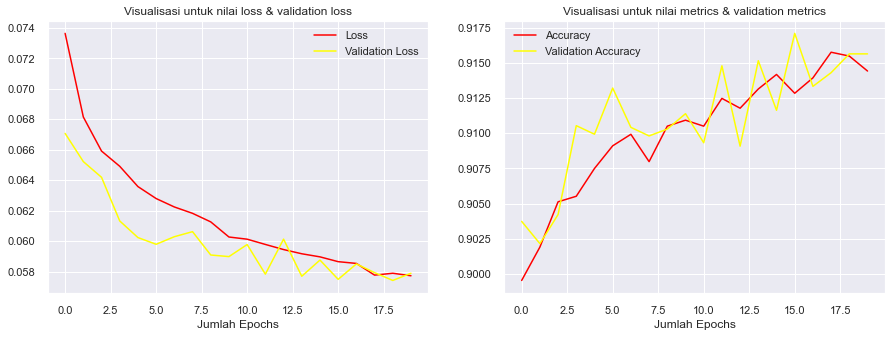

In [167]:
# Membuat visualisasi dari hasil neural network antara loss, validation loss dan akurasi, validation akurasi
plt.figure(figsize=(15,5))

# Membuat visualisasi untuk nilai loss dan validation loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color="red", label="Loss")
plt.plot(history.history['val_loss'], color="yellow", label="Validation Loss")
plt.title("Visualisasi untuk nilai loss & validation loss")
plt.xlabel("Jumlah Epochs")
plt.legend()

# Membuat visualisasi untuk nilai akurasi dan validation akurasi
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color="red", label="Accuracy")
plt.plot(history.history['val_accuracy'], color="yellow", label="Validation Accuracy")
plt.title("Visualisasi untuk nilai metrics & validation metrics")
plt.xlabel("Jumlah Epochs")
plt.legend()
plt.show();